<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_09_IAckathon_Anomalias/blob/main/Detecci%C3%B3n_de_Anomal%C3%ADas_en_contratos_SERCOP_Grupo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto de Detección de Anomalías en Contratos del SERCOP**

El presente proyecto tiene como objetivo principal crear un algoritmo que detecte posibles anomalías en contratos realizados en compras públicas y que a través de modelos matemáticos, estadísticos y de inteligencia artificial podamos predecir datos a partir de datos públicos compartidos por la SERCOP.

Realizado por: Edisson Zuñiga Viteri, Mayra Viscaíno, Eduardo Sandoval

Instalamos e importamos las librerías necesarias para el proyecto

Usaremos la librería Skimpy en Python que proporciona herramientas para resumir y explorar conjuntos de datos de manera rápida y sencilla, generando estadísticas descriptivas y visualizaciones útiles. Es útil para obtener una visión general de los datos y comprender su estructura y distribución.

In [1]:
! pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  A

Usaremos Udataprep, es una biblioteca en Python que simplifica la preparación y limpieza de datos, ofreciendo herramientas para detectar y manejar valores faltantes, duplicados y atípicos, además de facilitar la ingeniería de características, lo que agiliza el proceso de preparación de datos para análisis y modelado.

In [2]:
!pip install -U dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 71.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252686 sha256=28ddccd0f8e

In [3]:
from skimpy import skim
from dataprep.eda import create_report

Usaremos también Pandas, Numpy, Seaborn, Scipy.stats

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

In [5]:
from textwrap import TextWrapper

In [6]:
''' Esta funcion es una utilitaria para imprimir los nombres de columnas y
que no toque hacer desplazamiento horizontal'''
# wrapper = textwrap.TextWrapper(width=100)
wrapper = TextWrapper(width=100)

## Datos

### Descargar datos

Descargamos los datos desde un Drive de Google

In [7]:
#https://docs.google.com/spreadsheets/d/16xhN600OTMNlhNuXPQFCsDxbhdnyliGS
!gdown --id 16xhN600OTMNlhNuXPQFCsDxbhdnyliGS

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16xhN600OTMNlhNuXPQFCsDxbhdnyliGS
To: /content/releases_2022.xlsx
100% 62.6M/62.6M [00:00<00:00, 189MB/s]


In [8]:
#https://docs.google.com/spreadsheets/d/1ozA5D-h5BhjdFVV5pDBKLbSPBLG_KL4x
!gdown --id 1ozA5D-h5BhjdFVV5pDBKLbSPBLG_KL4x

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ozA5D-h5BhjdFVV5pDBKLbSPBLG_KL4x
To: /content/releases_2023.xlsx
100% 26.1M/26.1M [00:00<00:00, 83.8MB/s]


Leemos la base de datos que hemos descargado, cabe mencionar que la base de datos esta por años, hemos elegido analizar la data correspondiente al año 2022 y para el año 2023. Cada una de estas bases de datos esta compuesta por hoja separadas según la etapa del proceso de compras públicas.

Tenemos hojas para las etapas de: Releases, Planning, Tender, Awards, AwardSupplier, contracts

Leemos la base de datos para el 2022

In [9]:
releases2022 = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Releases' )

Renombramos las columnas "id" para evitar repetición

In [10]:
releases2022.rename(columns={"id": "release_id"}, inplace= True)

In [11]:
releases2022.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag'],
      dtype='object')

Realizamos el mismo proceso para los datos del 2023

In [12]:
releases2023 = pd.read_excel("/content/releases_2023.xlsx", sheet_name= 'Releases' )

In [13]:
releases2023.rename(columns={"id": "release_id"}, inplace= True)

In [14]:
releases2023.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag'],
      dtype='object')

Unimos estos dos datos para tener una sola hoja de Releases

In [15]:
releases= pd.concat([releases2022,releases2023], ignore_index=True)

In [16]:
releases.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag'],
      dtype='object')

Realizamos el mismo proceso para el resto de hojas de las bases de datos

In [17]:
planning2022 = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Planning' )

In [18]:
planning2022.rename(columns={"id": "planning_id"}, inplace= True)

In [19]:
planning2023 = pd.read_excel("/content/releases_2023.xlsx", sheet_name= 'Planning' )

In [20]:
planning2023.rename(columns={"id": "planning_id"}, inplace= True)

In [21]:
planning= pd.concat([planning2022,planning2023], ignore_index=True)

In [22]:
planning.columns

Index(['ocid', 'planning_id', 'rationale', 'budget_id', 'budget_description',
       'budget_amount', 'budget_currency'],
      dtype='object')

In [23]:
tender2022 = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Tender' )

In [24]:
tender2022.rename(columns={"id": "tender_id"}, inplace= True)

In [25]:
tender2023 = pd.read_excel("/content/releases_2023.xlsx", sheet_name= 'Tender' )

In [26]:
tender2023.rename(columns={"id": "tender_id"}, inplace= True)

In [27]:
tender= pd.concat([tender2022,tender2023], ignore_index=True)

In [28]:
tender.columns

Index(['ocid', 'release_id', 'tender_id', 'title', 'description', 'status',
       'procuringEntity_id', 'procuringEntity_name', 'value_amount',
       'value_currency', 'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers'],
      dtype='object')

In [29]:
awards2022 = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Awards' )

In [30]:
awards2022.rename(columns={"id": "award_id"}, inplace= True)

In [31]:
awards2023 = pd.read_excel("/content/releases_2023.xlsx", sheet_name= 'Awards' )

In [32]:
awards2023.rename(columns={"id": "award_id"}, inplace= True)

In [33]:
awards= pd.concat([awards2022,awards2023], ignore_index=True)

In [34]:
awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays'],
      dtype='object')

In [35]:
award_supp2022 = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'AwardSuppliers' )

In [36]:
award_supp2022.rename(columns={"id": "award_supp_id"}, inplace= True)

In [37]:
award_supp2023 = pd.read_excel("/content/releases_2023.xlsx", sheet_name= 'AwardSuppliers' )

In [38]:
award_supp2023.rename(columns={"id": "award_supp_id"}, inplace= True)

In [39]:
award_supp= pd.concat([award_supp2022,award_supp2023], ignore_index=True)

In [40]:
award_supp.columns

Index(['ocid', 'release_id', 'award_id', 'award_supp_id', 'name'], dtype='object')

In [41]:
contracts2022 = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Contracts' )

In [42]:
contracts2022.rename(columns={"id": "contracts_id", "awardID": "award_id"}, inplace= True)

In [43]:
contracts2023 = pd.read_excel("/content/releases_2023.xlsx", sheet_name= 'Contracts' )

In [44]:
contracts2023.rename(columns={"id": "contracts_id", "awardID": "award_id"}, inplace= True)

In [45]:
contracts= pd.concat([contracts2022,contracts2023], ignore_index=True)

In [46]:
contracts.columns

Index(['ocid', 'release_id', 'contracts_id', 'award_id', 'title',
       'description', 'status', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays', 'amount', 'currency', 'dateSigned'],
      dtype='object')

### Entender y corregir Datos

#### Verificar unicos ocid

In [47]:
def colSoloUnicos(dataframe, columna):
    """
    Verifica si la columna especificada tiene solo valores únicos.

    Parámetros:
    dataframe (pandas.DataFrame): El DataFrame que contiene la columna.
    columna (str): El nombre de la columna a verificar.

    Retorna:
    bool: True si la columna tiene solo valores únicos, False en caso contrario.
    """
    # Comprueba si el número de valores únicos es igual al número total de filas
    return dataframe[columna].nunique() == dataframe[columna].count()


la función colSoloUnicos verifica si una columna en un DataFrame contiene valores únicos y se utiliza en un bucle for para verificar la columna 'ocid' en varios DataFrames y mostrar si los valores en esa columna son únicos o no.

In [48]:
for df in [releases, planning, tender, awards, award_supp, contracts]:
  print( colSoloUnicos(df, 'ocid') )

True
True
True
False
False
False


Realizamos el mismo proceso pero sobre la columna "releases_id"

In [49]:
for df in [releases, tender, awards, award_supp, contracts]:
  print( colSoloUnicos(df, 'release_id') )

True
True
False
False
False


Probamos para todas las columnas

In [50]:
for df, col in zip([releases, planning, tender, awards, award_supp, contracts], ['release_id', 'planning_id', 'tender_id', 'award_id', 'award_supp_id', 'contracts_id']):
  print( colSoloUnicos(df, col) )

True
True
True
False
False
False


Puedes existir varios awards por cada ocid

In [51]:
awards.groupby('ocid')['award_id'].size().reset_index(name='N').sort_values("N", ascending= False)

,ocid,N
232845,ocds-5wno2w-MCB-GADPE-02-2022-32109,164
232711,ocds-5wno2w-MCB-ALA21-003-2023-62486,134
232701,ocds-5wno2w-MCB-001-ALA21-2023-62486,130
232839,ocds-5wno2w-MCB-GADMT-115-2022-36463,106
232812,ocds-5wno2w-MCB-GADMN-CP005-2022-76661,105
...,...,...
94726,ocds-5wno2w-CE-20220002255030-531672,1
94727,ocds-5wno2w-CE-20220002255031-531672,1
94728,ocds-5wno2w-CE-20220002255032-531672,1
94729,ocds-5wno2w-CE-20220002255033-531672,1


Y varios ocid por award

In [52]:
awards.groupby('award_id')[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

,award_id,N
163890,CE-20220002265570,3
190863,CE-20220002301964,3
163888,CE-20220002265568,3
66772,CE-20220002127957,3
163887,CE-20220002265567,3
...,...,...
95805,CE-20220002168934,1
95806,CE-20220002168935,1
95807,CE-20220002168936,1
95808,CE-20220002168937,1


Vamos a verificar para el award específico "CE-20220002265567"

In [53]:
awards.loc[awards['award_id']=='CE-20220002265567']

,ocid,release_id,award_id,title,description,status,date,amount,currency,correctedValue_amount,correctedValue_currency,enteredValue_amount,enteredValue_currency,contractPeriod_startDate,contractPeriod_endDate,contractPeriod_maxExtentDate,contractPeriod_durationInDays
162314,ocds-5wno2w-CE-20220002265567-431380,CE-20220002265567-431380-2022-12-21T08:20:09.650Z,CE-20220002265567,NaN,NaN,active,NaN,3.18976,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176406,ocds-5wno2w-CE-20220002265567-1160054330001,CE-20220002265567-1160054330001-2023-01-18T08:...,CE-20220002265567,NaN,NaN,active,NaN,3.18976,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177215,ocds-5wno2w-CE-20220002265567-1124762,CE-20220002265567-1124762-2023-01-20T08:21:14....,CE-20220002265567,NaN,NaN,active,NaN,3.18976,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
tender.loc[tender['ocid'].isin(awards.loc[awards['award_id']=='CE-20220002265567']['ocid'])]

,ocid,release_id,tender_id,title,description,status,procuringEntity_id,procuringEntity_name,value_amount,value_currency,...,enquiryPeriod_endDate,enquiryPeriod_maxExtentDate,enquiryPeriod_durationInDays,hasEnquiries,eligibilityCriteria,awardPeriod_startDate,awardPeriod_endDate,awardPeriod_maxExtentDate,awardPeriod_durationInDays,numberOfTenderers
165306,ocds-5wno2w-CE-20220002265567-431380,CE-20220002265567-431380-2022-12-21T08:20:09.650Z,CE-20220002265567-431380,Orden de compra CE-20220002265567,Orden de compra para adquirir los siguientes p...,complete,EC-RUC-1160054330001-431380,MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...,3.18976,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179673,ocds-5wno2w-CE-20220002265567-1160054330001,CE-20220002265567-1160054330001-2023-01-18T08:...,CE-20220002265567-1160054330001,Orden de compra CE-20220002265567,Orden de compra para adquirir los siguientes p...,complete,NaN,NaN,3.18976,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180497,ocds-5wno2w-CE-20220002265567-1124762,CE-20220002265567-1124762-2023-01-20T08:21:14....,CE-20220002265567-1124762,Orden de compra CE-20220002265567,Orden de compra para adquirir los siguientes p...,complete,EC-RUC-1160054330001-1124762,MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...,3.18976,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
planning.loc[planning['ocid'].isin(awards.loc[awards['award_id']=='CE-20220002265567']['ocid'])]

,ocid,planning_id,rationale,budget_id,budget_description,budget_amount,budget_currency


In [56]:
releases.loc[releases['ocid'].isin(awards.loc[awards['award_id']=='CE-20220002265567']['ocid'])]

,ocid,release_id,initiationType,buyer_id,buyer_name,language,date,tag
174075,ocds-5wno2w-CE-20220002265567-431380,CE-20220002265567-431380-2022-12-21T08:20:09.650Z,tender,EC-RUC-1160054330001,MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...,es,2022-09-06T00:00:00-05:00,"[""tender"",""award"",""contract""]"
189069,ocds-5wno2w-CE-20220002265567-1160054330001,CE-20220002265567-1160054330001-2023-01-18T08:...,tender,EC-RUC-1160054330001,MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...,es,2022-09-06T00:00:00-05:00,"[""tender"",""award"",""contract""]"
189893,ocds-5wno2w-CE-20220002265567-1124762,CE-20220002265567-1124762-2023-01-20T08:21:14....,tender,EC-RUC-1160054330001,MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...,es,2022-09-06T00:00:00-05:00,"[""tender"",""award"",""contract""]"


Parece ser que la combinación 'ocid', 'award_id' es única

In [57]:
awards.groupby(['ocid', 'award_id'])[['title']].size().reset_index(name='N').sort_values("N", ascending= False)

,ocid,award_id,N
0,ocds-5wno2w--CEP-GADMLA-01-2023-91040,6196274--CEP-GADMLA-01-2023,1
191763,ocds-5wno2w-CE-20230002397902-3203,CE-20230002397902,1
191769,ocds-5wno2w-CE-20230002398005-534123,CE-20230002398005,1
191768,ocds-5wno2w-CE-20230002398004-353435,CE-20230002398004,1
191767,ocds-5wno2w-CE-20230002397938-537258,CE-20230002397938,1
...,...,...,...
95890,ocds-5wno2w-CE-20220002256452-8531,CE-20220002256452,1
95891,ocds-5wno2w-CE-20220002256454-133773,CE-20220002256454,1
95892,ocds-5wno2w-CE-20220002256455-133773,CE-20220002256455,1
95893,ocds-5wno2w-CE-20220002256456-133773,CE-20220002256456,1


In [58]:
award_supp.groupby('award_supp_id')[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

,award_supp_id,N
19979,EC-RUC-1790732657001-2854,84971
20229,EC-RUC-1791362160001-5430,9880
18231,EC-RUC-1713823365001-52654,4476
20684,EC-RUC-1792092108001-168552,4397
21021,EC-RUC-1792385512001-485219,3353
...,...,...
7330,EC-RUC-0916479611001-19598,1
7328,EC-RUC-0916464985001-80386,1
16796,EC-RUC-1704482502001-19630,1
7324,EC-RUC-0916448970001-1006869,1


In [59]:
award_supp.groupby(['ocid', 'award_id'])[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

,ocid,award_id,N
0,ocds-5wno2w--CEP-GADMLA-01-2023-91040,6196274--CEP-GADMLA-01-2023,1
191763,ocds-5wno2w-CE-20230002397902-3203,CE-20230002397902,1
191769,ocds-5wno2w-CE-20230002398005-534123,CE-20230002398005,1
191768,ocds-5wno2w-CE-20230002398004-353435,CE-20230002398004,1
191767,ocds-5wno2w-CE-20230002397938-537258,CE-20230002397938,1
...,...,...,...
95890,ocds-5wno2w-CE-20220002256452-8531,CE-20220002256452,1
95891,ocds-5wno2w-CE-20220002256454-133773,CE-20220002256454,1
95892,ocds-5wno2w-CE-20220002256455-133773,CE-20220002256455,1
95893,ocds-5wno2w-CE-20220002256456-133773,CE-20220002256456,1


In [60]:
contracts.groupby('ocid')[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

,ocid,N
228897,ocds-5wno2w-MCB-GADPE-02-2022-32109,164
228788,ocds-5wno2w-MCB-ALA21-003-2023-62486,134
228780,ocds-5wno2w-MCB-001-ALA21-2023-62486,130
228892,ocds-5wno2w-MCB-GADMT-115-2022-36463,106
228874,ocds-5wno2w-MCB-GADMN-CP005-2022-76661,105
...,...,...
89079,ocds-5wno2w-CE-20220002249105-70634,1
89080,ocds-5wno2w-CE-20220002249106-70634,1
89081,ocds-5wno2w-CE-20220002249107-70634,1
89082,ocds-5wno2w-CE-20220002249108-70634,1


In [61]:
contracts.groupby('contracts_id')[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

,contracts_id,N
173203,CE-20220002301969-contract,3
173199,CE-20220002301965-contract,3
173207,CE-20220002301973-contract,3
173206,CE-20220002301972-contract,3
173205,CE-20220002301971-contract,3
...,...,...
89914,CE-20220002185312-contract,1
89915,CE-20220002185313-contract,1
89916,CE-20220002185314-contract,1
89917,CE-20220002185315-contract,1


In [62]:
contracts.groupby(['ocid', 'award_id'])[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

,ocid,award_id,N
232225,ocds-5wno2w-MCO-BALAG-003-2022-108230,5874765-MCO-BALAG-003-2022,2
227061,ocds-5wno2w-COTS-SZE-001-2022-110642,5362321-COTS-SZE-001-2022,2
236175,ocds-5wno2w-MCS-ARCFIZ-05-2022-869714,5582492-MCS-ARCFIZ-05-2022,2
233040,ocds-5wno2w-MCO-ETPMM-EP-04-2022-250950,5769585-MCO-ETPMM-EP-04-2022,2
235727,ocds-5wno2w-MCO-MDMQ-SE-03-2022-41357,5545625-MCO-MDMQ-SE-03-2022,2
...,...,...,...
89998,ocds-5wno2w-CE-20220002250465-1080583,CE-20220002250465,1
89999,ocds-5wno2w-CE-20220002250466-1080583,CE-20220002250466,1
90000,ocds-5wno2w-CE-20220002250467-1080583,CE-20220002250467,1
90001,ocds-5wno2w-CE-20220002250468-1080583,CE-20220002250468,1


In [63]:
contracts.loc[ (contracts['ocid']== 'ocds-5wno2w-MCO-ETPMM-EP-04-2022-250950') & (contracts['award_id']== '5769585-MCO-ETPMM-EP-04-2022' )]

,ocid,release_id,contracts_id,award_id,title,description,status,contractPeriod_startDate,contractPeriod_endDate,contractPeriod_maxExtentDate,contractPeriod_durationInDays,amount,currency,dateSigned
77285,ocds-5wno2w-MCO-ETPMM-EP-04-2022-250950,MCO-ETPMM-EP-04-2022-250950-2023-01-17T09:55:2...,2134621-MCO-ETPMM-EP-04-2022,5769585-MCO-ETPMM-EP-04-2022,NaN,NaN,terminated,2022-09-27T00:00:00-05:00,2022-10-27T00:00:00-05:00,NaN,30.0,19861.37,USD,2022-09-13T00:00:00-05:00
77286,ocds-5wno2w-MCO-ETPMM-EP-04-2022-250950,MCO-ETPMM-EP-04-2022-250950-2023-01-17T09:55:2...,2152442-MCO-ETPMM-EP-04-2022,5769585-MCO-ETPMM-EP-04-2022,NaN,NaN,terminated,2022-12-14T00:00:00-05:00,2022-12-19T00:00:00-05:00,NaN,5.0,5000.00,USD,2022-12-14T00:00:00-05:00


#### Unir datos

Vamos a formar la base de datos con la que se trabajará, es necesario unir todas las hojas que contienen cada etapa del proceso

In [64]:
base = releases.merge(planning, how= 'outer', on= 'ocid')
base.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency'],
      dtype='object')

In [65]:
base = base.merge(tender, how= 'outer', on= ['ocid', 'release_id'])

In [66]:
base.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title', 'description', 'status', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers'],
      dtype='object')

In [67]:
contr_award = contracts.groupby(['ocid', 'award_id']).agg({'amount': 'sum', 'contracts_id': 'size', 'contractPeriod_durationInDays': 'sum'}).reset_index()
contr_award.rename(columns={'amount': 'sum_contr', 'contracts_id': 'n_contr', 'contractPeriod_durationInDays': 'durac_cont_tot'}, inplace= True)

In [68]:
contr_award

,ocid,award_id,sum_contr,n_contr,durac_cont_tot
0,ocds-5wno2w-.MCO-GADMP-05-2022.-27207,5792228-.MCO-GADMP-05-2022.,32022.54,1,60.0
1,ocds-5wno2w-001-CDC-CCENL-2022-81401,5688371-001-CDC-CCENL-2022,1427.70,1,10.0
2,ocds-5wno2w-001-LICS-CBT-001-202-142333,5393270-001-LICS-CBT-001-202,9551.62,1,30.0
3,ocds-5wno2w-001-LICS-CBT-001-202-142333,5393299-001-LICS-CBT-001-202,945.02,1,30.0
4,ocds-5wno2w-01D06-MCO-0001-2022-535961,5566739-01D06-MCO-0001-2022,41626.85,1,45.0
...,...,...,...,...,...
269974,ocds-5wno2w-SSIE-MDMQ-AZM-06-202-41357,1933586-SSIE-MDMQ-AZM-06-202,16888.00,1,240.0
269975,ocds-5wno2w-SVP-CEBAL-2022-01-95186,1895704-SVP-CEBAL-2022-01,95000.00,1,1095.0
269976,ocds-5wno2w-UAFE-COT-2023-001-105932,6552029-UAFE-COT-2023-001,63467.46,1,365.0
269977,ocds-5wno2w-sie-dd18d02-004-2023-2727,2090890-sie-dd18d02-004-2023,50800.00,1,30.0


In [69]:
base_awards = awards.merge(award_supp, how= 'outer', on= ['ocid', 'release_id', 'award_id'])
base_awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays', 'award_supp_id', 'name'],
      dtype='object')

In [70]:
base_awards = base_awards.merge(contr_award, how= 'outer', on= ['ocid', 'award_id'])

In [71]:
base_awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays', 'award_supp_id', 'name', 'sum_contr',
       'n_contr', 'durac_cont_tot'],
      dtype='object')

#### Descriptivas

Usamos la librería skim para obtener una descripción general de base

In [72]:
skim(base)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 303576 │ │ string      │ 32    │                                                          │
│ │ Number of columns │ 40     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %  ┃ mean   ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ budget_descripti │ 303576 │   100 │    nan │     nan │   nan │   nan │   nan │    nan │       nan │        │  │
│ │ on               │        │       │        │         │       │       │       │        │           │        │  │
│ │ budget_amount    │ 265330 │  87.4 │ 210000 │ 1700000 │     3 │ 14000 │ 39000 │ 120000 │ 200000000 │   ▇    │  │
│ │ value_amount     │  49362 │ 16.26 │  31000 │  610000 │ 0.017 │    26 │   220 │   3300 │ 200000000 │   ▇    │  │
│ │ tenderPeriod_dur │ 277518 │ 91.42 │     10 │     8.5 │     1 │     5 │     8 │     14 │       170 │   ▇    │  │
│ │ ationInDays      │        │       │        │         │       │       │       │        │           │        │  │
│ │ enquiryPeriod_du │ 246121 │ 81.07 │    3.6 │     4.7 │     1 │     1 │     3 │      5 │       160 │   ▇    │  │
│ │ rationInDays     │        │       │        │         │       │       │       │        │           │        │  │
│ │ hasEnquiries     │ 259253 │  85.4 │      1 │       0 │     1 │     1 │     1 │      1 │         1 │     ▇  │  │
│ │ awardPeriod_dura │ 267831 │ 88.23 │    5.8 │      15 │     1 │     3 │     5 │      6 │       740 │   ▇    │  │
│ │ tionInDays       │        │       │        │         │       │       │       │        │           │        │  │
│ │ numberOfTenderer │ 235700 │ 77.64 │    5.4 │      23 │     1 │     1 │     2 │      4 │       600 │   ▇    │  │
│ │ s                │        │       │        │         │       │       │       │        │           │        │  │
│ └──────────────────┴────────┴───────┴────────┴─────────┴───────┴───────┴───────┴────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA          ┃ NA %      ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ocid                               │           0 │         0 │                      1 │             303592 │  │
│ │ release_id                         │           0 │         0 │                      1 │             303592 │  │
│ │ initiationType                     │           0 │         0 │                      1 │             303576 │  │
│ │ buyer_id                           │           0 │         0 │                      1 │             303576 │  │
│ │ buyer_name                         │           0 │  

#### Filtrar tender no vacio

In [73]:
base_cleaned = base.loc[base['tender_id'].notnull() & base['procurementMethod'].notnull() & base['procurementMethodDetails'].notnull() ]

### Ingenieria de Variables

Vamos a crear variables que puedan dar indicios al modelo, por ejemplo:   
**OCID**
- el número único de ganadores (award_id)
- Suma de los valores finales que ofertaron los ganadores
- duración máxima del periodo de contrato

**Buyer**
- número único de ocid
- el presupuesto total (suma de los valores de amount)
-la duración promedio del período de licitación (tenderPeriod_durationInDays)
-el número promedio de licitantes (numberOfTenderers)
-También cuenta el número de ocid para compras directas, selectivas y para compras directas de bienes y servicios únicos, así como para compras abiertas de cotizaciones


**Buyer y Award**
- número único de ocid
- el presupuesto total de awards
- la duración promedio del período de licitación
- el número promedio de licitantes en esos awards
- número de ocid para compras directas, selectivas, para compras directas de bienes y servicios únicos, y para compras abiertas de cotizaciones


#### Asociadas a awards

Vamos a obtener variables a nivel de ocid a partir de los awards

Para entender las variables puede ser necesario revisar el siguiente link con el estandar internacional de datos abiertos

https://standard.open-contracting.org/latest/en/schema/reference/#award

In [74]:
awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays'],
      dtype='object')

In [75]:
# awards.groupby('ocid').agg({'amount': 'sum', 'contractPeriod_durationInDays': 'max'}).reset_index()

En la siguiente función calculamos 3 estadísticas en un DataFrame df relacionado con awards: el número único de ganadores (award_id), la suma de los montos (amount) y la duración máxima del periodo de contrato (contractPeriod_durationInDays). La función devuelve estas estadísticas como un objeto.

In [76]:
# Definir una función personalizada para aplicar a cada grupo
def ing_var_awards(df):
    return pd.Series({'Num_Award': df['award_id'].nunique(),
                      'Sum_Award': df['amount'].sum(),
                      'MaxDuration': df['contractPeriod_durationInDays'].max()})


Aplicamos la función anterior a la data agrupando por ocid para obtener la variable "ocidvar_awards"

In [77]:
# Aplicar la función a cada grupo por ocid
ocidvar_awards = awards.groupby('ocid').apply(ing_var_awards)

In [78]:
ocidvar_awards.columns

Index(['Num_Award', 'Sum_Award', 'MaxDuration'], dtype='object')

Unimos esta columna nueva de la variable "ocidvar_awards" a la base original para obtener variables importantes para los modelos a aplicar.

In [79]:
base = base.merge(ocidvar_awards, how= 'outer', on= ['ocid'])

In [80]:
base.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title', 'description', 'status', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'Num_Award', 'Sum_Award', 'MaxDuration'],
      dtype='object')

#### Asociadas al Buyer

Realizamos un nueva ingeniería de variables, esta vez para encontrar variables relacionadas con el "buyer"



In [81]:
base.head()

,ocid,release_id,initiationType,buyer_id,buyer_name,language,date,tag,planning_id,rationale,...,hasEnquiries,eligibilityCriteria,awardPeriod_startDate,awardPeriod_endDate,awardPeriod_maxExtentDate,awardPeriod_durationInDays,numberOfTenderers,Num_Award,Sum_Award,MaxDuration
0,ocds-5wno2w-MCO-EPMAPS-GT32-2022-258814,MCO-EPMAPS-GT32-2022-258814-2023-02-11T11:00:2...,tender,EC-RUC-1768154260001-258814,Empresa Pública Metropolitana de Agua Potable ...,es,2023-02-11T06:02:27-05:00,"[""planning"",""tender"",""award""]",MCO-EPMAPS-GT32-2022-258814-2023-02-11T11:00:2...,CONSTRUCCIÓN DEL PROYECTO: OBRAS DE PROTECCIÓ...,...,1.0,"Trabajos similares exitosos,Participación Naci...",NaN,2023-01-31T18:00:00-05:00,2023-01-31T18:00:00-05:00,NaN,46.0,1.0,233105.98000,NaN
1,ocds-5wno2w-MCO-MAATE-005-2022-1007399,MCO-MAATE-005-2022-1007399-2023-02-11T10:52:12...,tender,EC-RUC-1768192860001-1007399,"MINISTERIO DEL AMBIENTE, AGUA Y TRANSICION ECO...",es,2023-02-11T06:02:30-05:00,"[""planning"",""tender"",""award"",""contract""]",MCO-MAATE-005-2022-1007399-2023-02-11T10:52:12...,CONSTRUCCIÓN DE UNA GUARDIANÍA PARA LA RESERVA...,...,1.0,"Metodología y Cronograma,Equipo Propuesto,Pers...",NaN,2022-08-30T20:00:00-05:00,2022-08-30T20:00:00-05:00,NaN,3.0,1.0,143938.73000,NaN
2,ocds-5wno2w-MCS-GADMCQ-009-2022-36121,MCS-GADMCQ-009-2022-36121-2023-02-11T11:01:44....,tender,EC-RUC-0860000590001-36121,GAD MUNICIPAL DE QUININDE,es,2022-12-28T00:00:00-05:00,"[""planning""]",MCS-GADMCQ-009-2022-36121-2023-02-11T11:01:44....,SERVICIO DE REALIZACIÓN DE SEÑALÉTICA Y DEMARC...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ocds-5wno2w-SIE-GADMC-021-2022-35903,SIE-GADMC-021-2022-35903-2023-02-11T10:59:17.6...,tender,EC-RUC-1160000400001-35903,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,es,2023-02-11T06:02:41-05:00,"[""planning"",""tender"",""award""]",SIE-GADMC-021-2022-35903-2023-02-11T10:59:17.6...,“ADQUISICIÓN DE UN RECOLECTOR DE BASURA DE 25 ...,...,1.0,NaN,2023-02-02T13:00:00-05:00,2023-02-08T20:00:00-05:00,2023-02-08T20:00:00-05:00,6.0,2.0,1.0,330680.92000,NaN
4,ocds-5wno2w-CE-20220002238648-3214,CE-20220002238648-3214-2023-02-13T08:02:37.344Z,tender,EC-RUC-1790053881001,EMPRESA ELÉCTRICA QUITO S.A. E.E.Q.,es,2022-07-13T00:00:00-05:00,"[""tender"",""award"",""contract""]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9087.55064,NaN


definimos una función para calcular varias estadísticas relacionadas con un comprador (buyer). Las estadísticas incluyen el número único de ocid, el presupuesto total (suma de los valores de amount), la duración promedio del período de licitación (tenderPeriod_durationInDays) y el número promedio de licitantes (numberOfTenderers). También cuenta el número de ocid para compras directas, selectivas y para compras directas de bienes y servicios únicos, así como para compras abiertas de cotizaciones. Los resultados se devuelven como un objeto

In [82]:
# Definir una función personalizada para aplicar a cada grupo
def ing_var_buyer(group):
    return pd.Series({'Byr_Num_ocid': group['ocid'].nunique(),
                      'Byr_Bdgt_Tot': group['value_amount'].sum(),
                      'Byr_TndrDurat_Mean': st.trim_mean( group['tenderPeriod_durationInDays'].dropna(), 0.05),
                      'Byr_NumTndr_Mean': st.trim_mean( group['numberOfTenderers'].dropna(), 0.05),
                      'Byr_Num_direct': group.loc[ group['procurementMethod']=='direct']['ocid'].nunique(),
                      'Byr_Num_selective': group.loc[ group['procurementMethod']=='selective']['ocid'].nunique(),
                      'Byr_Num_D_BieServ': group.loc[ (group['procurementMethod']=='direct') &
                                                 (group['procurementMethodDetails']=='Bienes y Servicios únicos')]['ocid'].nunique(),
                      'Byr_Num_O_Cotización': group.loc[ (group['procurementMethod']=='open') &
                                                 (group['procurementMethodDetails']=='Cotización')]['ocid'].nunique()
                      })

Aplicamos la función anterior a la base agrupando por "buyer_id" y esos valores se guardan en la variable "ocidvar_byr"

In [83]:
ocidvar_byr = base.groupby('buyer_id').apply(ing_var_buyer)

In [84]:
ocidvar_byr.columns

Index(['Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_TndrDurat_Mean',
       'Byr_NumTndr_Mean', 'Byr_Num_direct', 'Byr_Num_selective',
       'Byr_Num_D_BieServ', 'Byr_Num_O_Cotización'],
      dtype='object')

Esta nueva variable debe ser adjuntada a la base de datos

In [85]:
base = base.merge(ocidvar_byr, how= 'outer', on= ['buyer_id'])

In [86]:
base.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title', 'description', 'status', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'Num_Award', 'Sum_Award', 'MaxDuration',
       'Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_TndrDurat_Me

#### Asociadas al Award y Buyer

Realizamos otra ingeniería de variables para encontrar variables relacionadas con el Award y con el Buyer

In [87]:
base_awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays', 'award_supp_id', 'name', 'sum_contr',
       'n_contr', 'durac_cont_tot'],
      dtype='object')

Visualizamos las 5 primeras filas del data frame "base_awards" para identificar posibles variables

In [88]:
base_awards.head()

,ocid,release_id,award_id,title,description,status,date,amount,currency,correctedValue_amount,...,enteredValue_currency,contractPeriod_startDate,contractPeriod_endDate,contractPeriod_maxExtentDate,contractPeriod_durationInDays,award_supp_id,name,sum_contr,n_contr,durac_cont_tot
0,ocds-5wno2w-MCO-EPMAPS-GT32-2022-258814,MCO-EPMAPS-GT32-2022-258814-2023-02-11T11:00:2...,6140307-MCO-EPMAPS-GT32-2022,NaN,Proveedor ganador en el Sorteo MC-Obras con es...,NaN,NaN,233105.98000,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,EC-RUC-1792851963001-884897,CONSTRUCTORA IBARRA CEDEÑO IBA&CED CIA. LTDA.,NaN,NaN,NaN
1,ocds-5wno2w-MCO-MAATE-005-2022-1007399,MCO-MAATE-005-2022-1007399-2023-02-11T10:52:12...,5808394-MCO-MAATE-005-2022,NaN,Proveedor ganador en el Sorteo MC-Obras con es...,NaN,NaN,143938.73000,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,EC-RUC-1900530575001-790872,ILLESCAS ZHININ GALO JAVIER,143938.73,1.0,90.0
2,ocds-5wno2w-SIE-GADMC-021-2022-35903,SIE-GADMC-021-2022-35903-2023-02-11T10:59:17.6...,2080101-SIE-GADMC-021-2022,NaN,Según informe en Oficio Nro. 001-COM-TEC-SIE-0...,NaN,2023-02-10T19:00:47-05:00,330680.92000,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,EC-RUC-0190316025001-80865,COMERCIAL CARLOS ROLDAN CIA. LTDA.,NaN,NaN,NaN
3,ocds-5wno2w-CE-20220002238648-3214,CE-20220002238648-3214-2023-02-13T08:02:37.344Z,CE-20220002238648,NaN,NaN,active,NaN,9087.55064,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,EC-RUC-1708525678001-1146,Buri Caraguay Victor Emilio,0.00,1.0,0.0
4,ocds-5wno2w-CE-20220002238650-3214,CE-20220002238650-3214-2023-02-13T08:02:37.557Z,CE-20220002238650,NaN,NaN,active,NaN,5460.94080,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,EC-RUC-1790554295001-2337,BUESTAN CIA. LTDA.,0.00,1.0,0.0


Unimos los dataframe "base" y "base_awards" para formar una base de datos final "basef" y visualizamos sus columnas

In [89]:
basef= base.merge( base_awards, how= 'outer', on= ['ocid', 'release_id'])
basef.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date_x', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title_x', 'description_x', 'status_x', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'Num_Award', 'Sum_Award', 'MaxDuration',
       'Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_Tndr

Definimos una nueva función para calcular el número único de ocid, el presupuesto total de awards, la duración promedio del período de licitación y el número promedio de licitantes en esos awards. También cuenta el número de ocid para compras directas, selectivas, para compras directas de bienes y servicios únicos, y para compras abiertas de cotizaciones. Los resultados se devuelven como un objeto

In [90]:
# Definir una función personalizada para aplicar a cada grupo
def ing_var_ByrAwrd(group):
    return pd.Series({'ByrAwrd_Num_ocid': group['ocid'].nunique(),
                      'ByrAwrd_Bdgt_Tot': group['amount'].sum(),
                      'ByrAwrd_TndrDurat_Mean': st.trim_mean( group['tenderPeriod_durationInDays'].dropna(), 0.05),
                      'ByrAwrd_NumTndr_Mean': st.trim_mean( group['numberOfTenderers'].dropna(), 0.05),
                      'ByrAwrd_Num_direct': group.loc[ group['procurementMethod']=='direct']['ocid'].nunique(),
                      'ByrAwrd_Num_selective': group.loc[ group['procurementMethod']=='selective']['ocid'].nunique(),
                      'ByrAwrd_Num_D_BieServ': group.loc[ (group['procurementMethod']=='direct') &
                                                 (group['procurementMethodDetails']=='Bienes y Servicios únicos')]['ocid'].nunique(),
                      'ByrAwrd_Num_O_Cotización': group.loc[ (group['procurementMethod']=='open') &
                                                 (group['procurementMethodDetails']=='Cotización')]['ocid'].nunique()
                      })

Aplicamos la función anterior a la base final "basef", agrupando por "buyer_id" y por "award_id"

In [91]:
# Aplicar la función a cada grupo por ocid
ByrAwrd_var = basef.groupby(['buyer_id', 'award_id']).apply(ing_var_ByrAwrd)

Visualizamos las columnas que hemos creado en la nueva variable "ByrAwrd_var"

In [92]:
ByrAwrd_var.columns

Index(['ByrAwrd_Num_ocid', 'ByrAwrd_Bdgt_Tot', 'ByrAwrd_TndrDurat_Mean',
       'ByrAwrd_NumTndr_Mean', 'ByrAwrd_Num_direct', 'ByrAwrd_Num_selective',
       'ByrAwrd_Num_D_BieServ', 'ByrAwrd_Num_O_Cotización'],
      dtype='object')

Unimos estas nuevas columnas a la base final "basef"

In [93]:
basef = basef.merge(ByrAwrd_var, how= 'outer', on= ['buyer_id', 'award_id'])

In [94]:
basef.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date_x', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title_x', 'description_x', 'status_x', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'Num_Award', 'Sum_Award', 'MaxDuration',
       'Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_Tndr

### Filtrar el tipo de contrato con el que va a trabajar

En este caso hemos decidido analizar los contratos de "Cotización" con el método "open"

Visualizamos las dimensiones del SataFrame usando .shape

In [95]:
basef.shape

(307088, 80)

seleccionamos filas del DataFrame "basef" donde tanto la columna 'procurementMethod' es 'open' como la columna 'procurementMethodDetails' es 'Cotización'. Luego, utilizando .shape obtenemos las dimensiones de filas y columnas después de la selección.

In [96]:
basef= basef.loc[ (basef['procurementMethod']=='open') & (basef['procurementMethodDetails']=='Cotización')]
basef.shape

(3650, 80)

La siguiente función crea una nueva columna llamada 'Porc_NumOcid_AwardByr' en el DataFrame "basef". Esta columna calcula un valor que representa la proporción (porcentaje) entre dos columnas existentes en el DataFrame: 'ByrAwrd_Num_ocid' (número de ocid en award-buyer) dividido por 'Byr_Num_ocid' (número de ocid en buyer). La columna resultante contiene el resultado de esta operación de división para cada fila en el DataFrame.

In [97]:
basef['Porc_NumOcid_AwardByr']=basef['ByrAwrd_Num_ocid'] / basef['Byr_Num_ocid']

Usando una función similar a la anterior obtenemos una variable de proporción (porcentaje) entre 'ByrAwrd_Bdgt_Tot' (presupuesto total en el award-buyer) y 'Byr_Bdgt_Tot' (presupuesto total en el buyer)

In [98]:
basef['Porc_Amount_vs_Bdgt_AwardByr']=basef['ByrAwrd_Bdgt_Tot'] / basef['Byr_Bdgt_Tot']

Creamos una columna llamada 'Ratio_NumTndr_Mean_AwardByr' en el DataFrame 'basef'. La columna calcula el cociente entre dos valores previamente calculados en el DataFrame: 'ByrAwrd_NumTndr_Mean' dividido por 'Byr_NumTndr_Mean'. El resultado en cada fila representa la relación entre el número promedio de licitantes en los ganadores (awards) y el número promedio de licitantes para el comprador (buyer).

In [99]:
basef['Ratio_NumTndr_Mean_AwardByr']=basef['ByrAwrd_NumTndr_Mean'] / basef['Byr_NumTndr_Mean']

Realizamos el mismo análisis para las siguientes variables

In [100]:
basef['Porc_direct_AwardByr']=basef['ByrAwrd_Num_direct'] / basef['Byr_Num_direct']
basef['Porc_selective_AwardByr']=basef['ByrAwrd_Num_selective'] / basef['Byr_Num_selective']
basef['Porc_D_BieServ_AwardByr']=basef['ByrAwrd_Num_D_BieServ'] / basef['Byr_Num_D_BieServ']
basef['Porc_O_Cotización']=basef['ByrAwrd_Num_O_Cotización'] / basef['Byr_Num_O_Cotización']

## Seleccion de variables que van al modelo

Selecionamos las variables que usaremos en los modelos de predicción

- coeficiente correlación (Multicolinealidad)
- porcentaje de vacíos
- la cantidad de elementos únicos porque no se va a dejar una variable categórica con muchos únicos


In [106]:
var_eleg= ['value_amount', 'numberOfTenderers', 'mainProcurementCategory',
           'Num_Award', 'Sum_Award',
           'Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_TndrDurat_Mean',
           'Byr_NumTndr_Mean', 'Byr_Num_direct', 'Byr_Num_selective',
           'Byr_Num_D_BieServ', 'Byr_Num_O_Cotización',
           'ByrAwrd_Num_ocid', 'ByrAwrd_Bdgt_Tot', 'ByrAwrd_TndrDurat_Mean',
           'ByrAwrd_NumTndr_Mean', 'ByrAwrd_Num_direct', 'ByrAwrd_Num_selective',
           'ByrAwrd_Num_D_BieServ', 'ByrAwrd_Num_O_Cotización',
           'Porc_NumOcid_AwardByr', 'Porc_Amount_vs_Bdgt_AwardByr', 'Ratio_NumTndr_Mean_AwardByr',
           'Porc_direct_AwardByr',
          #  'Porc_selective_AwardByr',
           'Porc_D_BieServ_AwardByr', 'Porc_O_Cotización']
var_id=['ocid', 'buyer_id','award_id']

Luego de definir las variables Unimos todas en un solo DataFrame

In [107]:
var_id + var_eleg

['ocid',
 'buyer_id',
 'award_id',
 'value_amount',
 'numberOfTenderers',
 'mainProcurementCategory',
 'Num_Award',
 'Sum_Award',
 'Byr_Num_ocid',
 'Byr_Bdgt_Tot',
 'Byr_TndrDurat_Mean',
 'Byr_NumTndr_Mean',
 'Byr_Num_direct',
 'Byr_Num_selective',
 'Byr_Num_D_BieServ',
 'Byr_Num_O_Cotización',
 'ByrAwrd_Num_ocid',
 'ByrAwrd_Bdgt_Tot',
 'ByrAwrd_TndrDurat_Mean',
 'ByrAwrd_NumTndr_Mean',
 'ByrAwrd_Num_direct',
 'ByrAwrd_Num_selective',
 'ByrAwrd_Num_D_BieServ',
 'ByrAwrd_Num_O_Cotización',
 'Porc_NumOcid_AwardByr',
 'Porc_Amount_vs_Bdgt_AwardByr',
 'Ratio_NumTndr_Mean_AwardByr',
 'Porc_direct_AwardByr',
 'Porc_D_BieServ_AwardByr',
 'Porc_O_Cotización']

Eliminamos los NaN

In [108]:
base_pred = basef[var_id + var_eleg].dropna()

Generamos un entrenamiento inicial y visualizamos las dimensiones con .shape

In [109]:
train= base_pred[ var_eleg ]
train.shape

(2144, 27)

Visualizamos el Train

In [110]:
train

,value_amount,numberOfTenderers,mainProcurementCategory,Num_Award,Sum_Award,Byr_Num_ocid,Byr_Bdgt_Tot,Byr_TndrDurat_Mean,Byr_NumTndr_Mean,Byr_Num_direct,...,ByrAwrd_Num_direct,ByrAwrd_Num_selective,ByrAwrd_Num_D_BieServ,ByrAwrd_Num_O_Cotización,Porc_NumOcid_AwardByr,Porc_Amount_vs_Bdgt_AwardByr,Ratio_NumTndr_Mean_AwardByr,Porc_direct_AwardByr,Porc_D_BieServ_AwardByr,Porc_O_Cotización
2,6.700460e+05,25.0,works,1.0,509140.1400,450.0,7.381632e+07,13.888889,6.639610,72.0,...,0.0,0.0,0.0,1.0,0.002222,0.006897,3.765281,0.0,0.0,0.015152
3,2.883965e+05,18.0,works,1.0,218907.6600,450.0,7.381632e+07,13.888889,6.639610,72.0,...,0.0,0.0,0.0,1.0,0.002222,0.002966,2.711002,0.0,0.0,0.015152
4,2.508551e+05,33.0,works,1.0,185813.2000,450.0,7.381632e+07,13.888889,6.639610,72.0,...,0.0,0.0,0.0,1.0,0.002222,0.002517,4.970171,0.0,0.0,0.015152
7,2.984385e+05,34.0,works,1.0,228753.3400,450.0,7.381632e+07,13.888889,6.639610,72.0,...,0.0,0.0,0.0,1.0,0.002222,0.003099,5.120782,0.0,0.0,0.015152
165,1.013870e+06,5.0,works,1.0,726659.8300,450.0,7.381632e+07,13.888889,6.639610,72.0,...,0.0,0.0,0.0,1.0,0.002222,0.009844,0.753056,0.0,0.0,0.015152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291891,3.285067e+05,13.0,works,1.0,307438.4268,14.0,9.177497e+05,9.833333,7.222222,5.0,...,0.0,0.0,0.0,1.0,0.071429,0.334992,1.800000,0.0,0.0,0.500000
292105,8.000000e+04,2.0,services,1.0,80000.0000,11.0,2.840857e+05,10.000000,3.714286,2.0,...,0.0,0.0,0.0,1.0,0.090909,0.281605,0.538462,0.0,0.0,0.500000
292108,6.917147e+04,1.0,services,1.0,69171.4700,11.0,2.840857e+05,10.000000,3.714286,2.0,...,0.0,0.0,0.0,1.0,0.090909,0.243488,0.269231,0.0,0.0,0.500000
299063,2.250000e+05,3.0,services,1.0,225000.0000,17.0,5.344116e+06,10.700000,1.642857,8.0,...,0.0,0.0,0.0,1.0,0.058824,0.042102,1.826087,0.0,0.0,0.500000


# MODELOS

Importamos todos los modelos que usaremos

Pipeline y ColumnTransformer permiten automatizar el procesamiento de datos.
SimpleImputer se utiliza para tratar valores faltantes.
OneHotEncoder convierte variables categóricas en binarias.
StandardScaler estandariza características numéricas.
PolynomialFeatures crea características polinómicas.
IsolationForest detecta anomalías en datos.
LocalOutlierFactor también detecta anomalías, considerando la densidad local.

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

## Preprocesamiento

 Crearemos listas para identificar qué columnas son categóricas y cuáles son numéricas en el dataset.

categorical_columns: Esta lista contiene los nombres de las columnas que se consideran categóricas. En este caso, la lista contiene una sola columna llamada 'mainProcurementCategory'.

numerical_columns: La lista incluye múltiples columnas numéricas, como 'numberOfTenderers', 'Num_Award', 'Sum_Award', entre otras, que contienen valores numéricos relevantes para el análisis de datos.

Estas listas son útiles al realizar operaciones específicas en diferentes tipos de columnas, como preprocesamiento de datos, transformaciones y análisis estadísticos. Al categorizar las columnas de esta manera, facilita el trabajo con diferentes tipos de datos.

In [112]:
categorical_columns = ['mainProcurementCategory' ]

numerical_columns = var_eleg= [
    # 'value_amount',
    'numberOfTenderers',
           'Num_Award', 'Sum_Award',
                              #  'MaxDuration',
          #  'Byr_Num_ocid',
                               'Byr_Bdgt_Tot', 'Byr_TndrDurat_Mean',
           'Byr_NumTndr_Mean',
                              #  'Byr_Num_direct', 'Byr_Num_selective',
          #  'Byr_Num_D_BieServ',
           'ByrAwrd_Num_ocid', 'ByrAwrd_Bdgt_Tot', 'ByrAwrd_TndrDurat_Mean',
           'ByrAwrd_NumTndr_Mean', 'ByrAwrd_Num_direct', 'ByrAwrd_Num_selective',
           'ByrAwrd_Num_D_BieServ',
           'Porc_NumOcid_AwardByr', 'Porc_Amount_vs_Bdgt_AwardByr', 'Ratio_NumTndr_Mean_AwardByr',
           'Porc_direct_AwardByr',
                              #  'Porc_selective_AwardByr',
                               'Porc_D_BieServ_AwardByr',
                                'Porc_O_Cotización']

## Isolation Forest

El modelo Isolation Forest es un algoritmo de detección de anomalías utilizado en machine learning. Su enfoque es identificar observaciones atípicas o anómalas en un conjunto de datos. Aquí hay una explicación sencilla de cómo funciona:

Idea Principal: El Isolation Forest se basa en la idea de que las anomalías son excepciones y, por lo tanto, deberían ser más fáciles de aislar que las observaciones normales en un conjunto de datos.

Árboles de Decisión Aleatorios: El algoritmo crea un conjunto de árboles de decisión aleatorios. Cada árbol se construye de manera que se seleccione aleatoriamente una característica y un valor de corte en cada paso para dividir los datos en dos partes. Este proceso se repite hasta que todas las observaciones se hayan aislado en nodos hoja.

Detección de Anomalías: Para detectar anomalías, se evalúa cuántos pasos son necesarios para aislar cada observación. Las anomalías generalmente requieren menos pasos para ser aisladas que las observaciones normales. Por lo tanto, las observaciones que requieren menos pasos se consideran más anómalas.

Score de Anomalía: El modelo asigna un puntaje de anomalía a cada observación en función de la cantidad promedio de pasos necesarios para aislarla en todos los árboles. Las observaciones con puntajes más bajos son consideradas más anómalas.

Umbral de Detección: Se establece un umbral de detección para clasificar las observaciones como anómalas o normales. Las observaciones con puntajes por debajo del umbral se etiquetan como anomalías, mientras que las que están por encima se consideran normales.

Realizamos una transformación de columnas utilizando ColumnTransformer de scikit-learn:

'encoder': utiliza OneHotEncoder(). Lo que hace es convertir columnas categóricas en una serie de columnas binarias (0 o 1) para que puedan ser utilizadas en modelos de machine learning.

'scaler': utiliza StandardScaler(). Lo que hace es escalar las columnas numéricas de manera que tengan una media de cero y una desviación estándar de uno. Esto es útil para asegurarse de que las características numéricas tengan una escala común y no dominen el modelo debido a sus magnitudes.

In [113]:
prep = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns),
                   ('scaler', StandardScaler(),numerical_columns),],
                  remainder= 'drop')


creamos un pipeline llamado ifrst_pipe que se utiliza para aplicar un modelo de detección de anomalías Isolation Forest

In [114]:
ifrst_pipe = Pipeline([('preproc', prep),
                     ('ifrst', IsolationForest(n_estimators= 200, random_state=123)  )
                  ])

el pipeline ifrst_pipe toma el conjunto de datos, realiza un preprocesamiento en la primera etapa y luego aplica el modelo Isolation Forest en la segunda etapa para detectar anomalías en los datos. Este enfoque ayuda a automatizar el flujo de trabajo y facilita la aplicación del modelo a nuevos datos de manera consistente.

Ahora ajustamos o entrenamos el modelo de detección de anomalías basado en Isolation Forest (ifrst_pipe) utilizando un conjunto de datos de entrenamiento llamado train. En otras palabras, el modelo aprende a identificar patrones y características de los datos normales en el conjunto de entrenamiento.

In [115]:
ifrst_pipe.fit(train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['mainProcurementCategory']),
                                                 ('scaler', StandardScaler(),
                                                  ['numberOfTenderers',
                                                   'Num_Award', 'Sum_Award',
                                                   'Byr_Bdgt_Tot',
                                                   'Byr_TndrDurat_Mean',
                                                   'Byr_NumTndr_Mean',
                                                   'ByrAwrd_Num_ocid',
                                                   'ByrAwrd_Bdgt_Tot',
                                                   'ByrAwrd_TndrDurat_Mean',
                                                   'ByrAwrd_NumTndr_Mean',
                                                   'ByrAwrd_Num_direct',
                                                   'ByrAwrd_Num_selective',
                                                   'ByrAwrd_Num_D_BieServ',
                                                   'Porc_NumOcid_AwardByr',
                                                   'Porc_Amount_vs_Bdgt_AwardByr',
                                                   'Ratio_NumTndr_Mean_AwardByr',
                                                   'Porc_direct_AwardByr',
                                                   'Porc_D_BieServ_AwardByr',
                                                   'Porc_O_Cotización'])])),
                ('ifrst', IsolationForest(n_estimators=200, random_state=123))])

In [116]:
base_pred.shape

(2144, 30)

aplicamosel modelo Isolation Forest que previamente se entrenó para predecir si cada observación en base_pred es una anomalía o no. El resultado de estas predicciones se almacena en la variable y_pred_ifrst, donde cada valor representa una predicción para una observación específica en base_pred.

In [117]:
y_pred_ifrst= ifrst_pipe.predict( base_pred )

La siguiente línea devuelve un arreglo con los valores únicos presentes en y_pred_ifrst. Estos valores representan las predicciones del modelo de detección de anomalías, donde cada valor puede ser 1 (para anomalías) o -1 (para observaciones normales).

In [118]:
np.unique(y_pred_ifrst, return_counts=True)

(array([-1,  1]), array([ 297, 1847]))

adjuntamos las predicciones del modelo (contenidas en y_pred_ifrst) como una nueva columna en "base_pred"

In [119]:
base_pred['y_pred_ifrst']= y_pred_ifrst

##### Descriptivas por anomalia y no anomalia

Ahora dividimos las observaciones en dos grupos: uno para las predicciones de anomalías (posiblemente -1) y otro para las observaciones normales (posiblemente 1) y calculamos el valor promedio de cada columna numérica en cada uno de los dos grupos creados.

In [120]:
base_pred.groupby('y_pred_ifrst').mean()

<ipython-input-120-796909283d77>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_pred.groupby('y_pred_ifrst').mean()


,value_amount,numberOfTenderers,Num_Award,Sum_Award,Byr_Num_ocid,Byr_Bdgt_Tot,Byr_TndrDurat_Mean,Byr_NumTndr_Mean,Byr_Num_direct,Byr_Num_selective,...,ByrAwrd_Num_direct,ByrAwrd_Num_selective,ByrAwrd_Num_D_BieServ,ByrAwrd_Num_O_Cotización,Porc_NumOcid_AwardByr,Porc_Amount_vs_Bdgt_AwardByr,Ratio_NumTndr_Mean_AwardByr,Porc_direct_AwardByr,Porc_D_BieServ_AwardByr,Porc_O_Cotización
y_pred_ifrst,,,,,,,,,,,,,,,,,,,,,
-1,311763.191615,7.249158,16.983165,287703.883934,312.959596,5.544052e+07,12.072130,8.370608,45.296296,42.077441,...,0.0,0.0,0.0,1.0,0.020930,0.092847,2.065189,0.0,0.0,0.270520
1,331939.403444,4.297239,2.019491,307402.216047,394.378452,5.845521e+07,12.607425,4.793233,57.892799,47.045479,...,0.0,0.0,0.0,1.0,0.009659,0.027336,1.239025,0.0,0.0,0.100557


## Local outlier Factor

El Local Outlier Factor es un algoritmo de detección de anomalías en datos que se utiliza para identificar observaciones atípicas o anómalas en un conjunto de datos. Su enfoque principal es evaluar la densidad local alrededor de cada punto de datos para determinar si un punto es una anomalía o no.

el pipeline "lof_pipe" toma un conjunto de datos, realiza un preprocesamiento en la primera etapa y luego aplica el modelo Local Outlier Factor en la segunda etapa para detectar anomalías en los datos

In [121]:
lof_pipe = Pipeline([('preproc', prep),
                     ('lof', LocalOutlierFactor(n_neighbors= 50, novelty=True)  )
                  ])

Entrenamos el modelo

In [122]:
lof_pipe.fit(train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['mainProcurementCategory']),
                                                 ('scaler', StandardScaler(),
                                                  ['numberOfTenderers',
                                                   'Num_Award', 'Sum_Award',
                                                   'Byr_Bdgt_Tot',
                                                   'Byr_TndrDurat_Mean',
                                                   'Byr_NumTndr_Mean',
                                                   'ByrAwrd_Num_ocid',
                                                   'ByrAwrd_Bdgt_Tot',
                                                   'ByrAwrd_TndrDurat_Mean',
                                                   'ByrAwrd_NumTndr_Mean',
                                                   'ByrAwrd_Num_direct',
                                                   'ByrAwrd_Num_selective',
                                                   'ByrAwrd_Num_D_BieServ',
                                                   'Porc_NumOcid_AwardByr',
                                                   'Porc_Amount_vs_Bdgt_AwardByr',
                                                   'Ratio_NumTndr_Mean_AwardByr',
                                                   'Porc_direct_AwardByr',
                                                   'Porc_D_BieServ_AwardByr',
                                                   'Porc_O_Cotización'])])),
                ('lof', LocalOutlierFactor(n_neighbors=50, novelty=True))])

Realizamos las predicciones con el modelo Local Outlier Factor (LOF)

In [123]:
y_pred_lof= lof_pipe.predict( base_pred )

In [124]:
np.unique(y_pred_lof, return_counts=True)

(array([-1,  1]), array([  86, 2058]))

In [125]:
base_pred['y_pred_lof']= y_pred_lof

##### Descriptivas por anomalia y no anomalia

In [126]:
base_pred.groupby('y_pred_lof').mean()

<ipython-input-126-48b94811e4bc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_pred.groupby('y_pred_lof').mean()


,value_amount,numberOfTenderers,Num_Award,Sum_Award,Byr_Num_ocid,Byr_Bdgt_Tot,Byr_TndrDurat_Mean,Byr_NumTndr_Mean,Byr_Num_direct,Byr_Num_selective,...,ByrAwrd_Num_selective,ByrAwrd_Num_D_BieServ,ByrAwrd_Num_O_Cotización,Porc_NumOcid_AwardByr,Porc_Amount_vs_Bdgt_AwardByr,Ratio_NumTndr_Mean_AwardByr,Porc_direct_AwardByr,Porc_D_BieServ_AwardByr,Porc_O_Cotización,y_pred_ifrst
y_pred_lof,,,,,,,,,,,,,,,,,,,,,
-1,315318.827991,8.686047,18.697674,288036.565429,229.034884,2.820372e+07,10.477659,26.792780,47.604651,49.918605,...,0.0,0.0,1.0,0.024193,0.110921,2.342077,0.0,0.0,0.347542,-0.697674
1,329722.219078,4.539845,3.482021,305368.708425,389.537901,5.928430e+07,12.619173,4.390181,56.504859,46.208455,...,0.0,0.0,1.0,0.010678,0.033298,1.312158,0.0,0.0,0.114764,0.782313


## Graficar con PCA

Realizamos un análisis de componentes principales PCA para poder graficar nuestros resultados

In [143]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Usamos un pipeline para un preprocesamiento con prep y luego aplica el PCA para reducir la dimensionalidad de los datos a solo 3 componentes principales. Este pipeline se puede usar para simplificar la representación de los datos y reducir la complejidad antes de aplicar modelos de machine learning o para visualizar datos en un espacio de menor dimensión.

In [144]:
pca_pipe = Pipeline([('preproc', prep),
                     ('pca', PCA(n_components=3)  )
                  ])

Ajustamos nuestro modelo PCA

In [145]:
pca_pipe.fit(train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['mainProcurementCategory']),
                                                 ('scaler', StandardScaler(),
                                                  ['numberOfTenderers',
                                                   'Num_Award', 'Sum_Award',
                                                   'Byr_Bdgt_Tot',
                                                   'Byr_TndrDurat_Mean',
                                                   'Byr_NumTndr_Mean',
                                                   'ByrAwrd_Num_ocid',
                                                   'ByrAwrd_Bdgt_Tot',
                                                   'ByrAwrd_TndrDurat_Mean',
                                                   'ByrAwrd_NumTndr_Mean',
                                                   'ByrAwrd_Num_direct',
                                                   'ByrAwrd_Num_selective',
                                                   'ByrAwrd_Num_D_BieServ',
                                                   'Porc_NumOcid_AwardByr',
                                                   'Porc_Amount_vs_Bdgt_AwardByr',
                                                   'Ratio_NumTndr_Mean_AwardByr',
                                                   'Porc_direct_AwardByr',
                                                   'Porc_D_BieServ_AwardByr',
                                                   'Porc_O_Cotización'])])),
                ('pca', PCA(n_components=3))])

pca_calculado contiene el conjunto de datos de entrenamiento transformado mediante PCA, lo que permite trabajar con una representación de menor dimensionalidad de los datos para análisis o modelado posterior. Esto es útil para reducir la complejidad de los datos y eliminar la redundancia de características.

In [146]:
pca_calculado= pca_pipe.transform(train)

In [147]:
pca_calculado.shape

(2144, 3)

creamos un arreglo que contiene todos los valores de la primera columna de los datos transformados por PCA

In [148]:
pca_calculado[:,0]

array([-5.37878302, -3.09930853, -6.08425579, ...,  4.89755172,
        2.00757198,  7.92573009])

la base "base_pred" contendrá una nueva columna llamada 'pca_1' que contiene los valores del primer componente principal calculado mediante PCA. se realiza lo mismo para pca_2 y pca_3

In [149]:
base_pred['pca_1']= pca_calculado[:,0]

In [150]:
base_pred['pca_2']= pca_calculado[:,1]

In [151]:
base_pred['pca_3']= pca_calculado[:,2]

Graficamos mediante un gráfico de dispersión, los puntos con anomalías son los de color rosa

usamos la combinación pca_1 y pca_2 para el Isolation Forest

<Axes: xlabel='pca_1', ylabel='pca_2'>

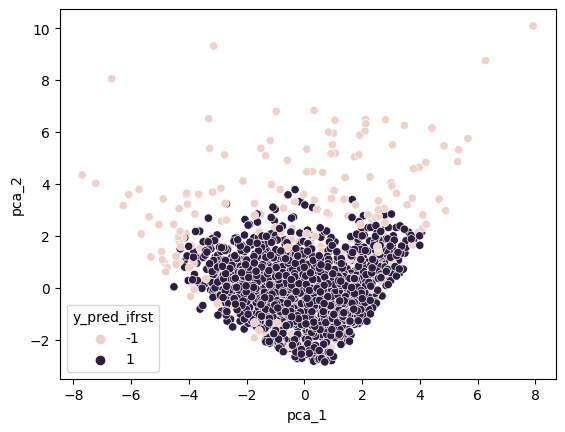

In [160]:
sns.scatterplot( base_pred, x='pca_1', y= 'pca_2', hue= 'y_pred_ifrst' )

usamos la combinación pca_3 y pca_2 para el Isolation Forest

<Axes: xlabel='pca_3', ylabel='pca_2'>

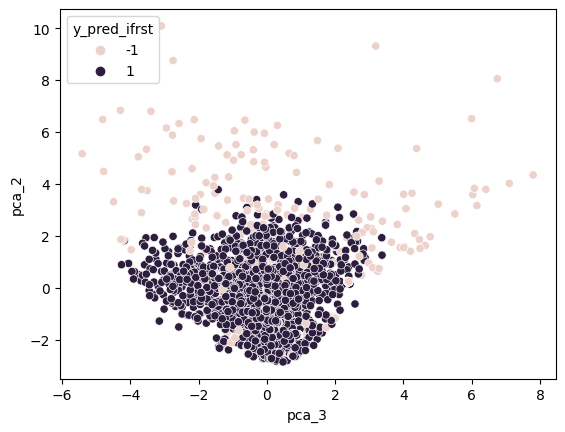

In [137]:
sns.scatterplot( base_pred, x='pca_3', y= 'pca_2', hue= 'y_pred_ifrst' )

usamos la combinación pca_1 y pca_3 para el Isolation Forest

<Axes: xlabel='pca_1', ylabel='pca_3'>

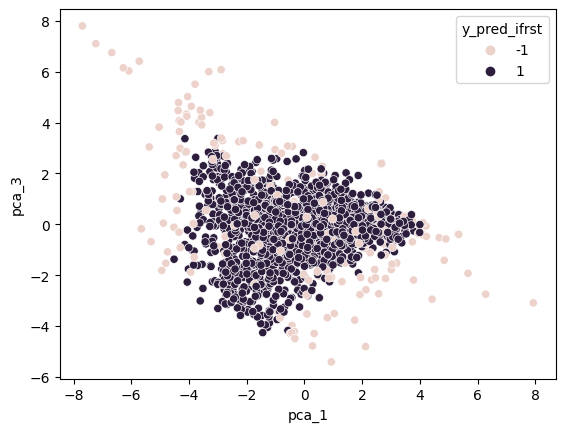

In [138]:
sns.scatterplot( base_pred, x='pca_1', y= 'pca_3', hue= 'y_pred_ifrst' )

usamos la combinación pca_1 y pca_2 para el Local Outlier Factor

<Axes: xlabel='pca_1', ylabel='pca_2'>

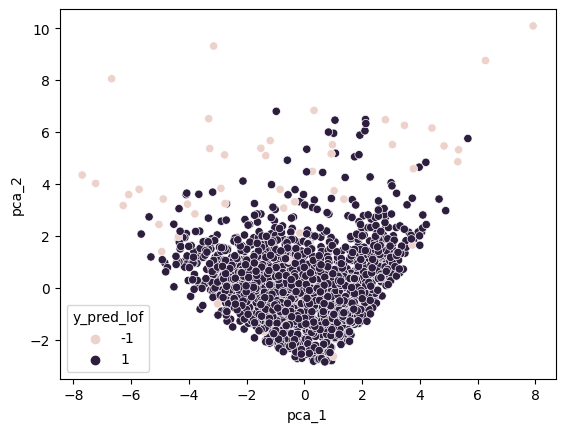

In [139]:
sns.scatterplot( base_pred, x='pca_1', y= 'pca_2', hue= 'y_pred_lof' )

usamos la combinación pca_3 y pca_2 para el Local Outlier Factor

<Axes: xlabel='pca_3', ylabel='pca_2'>

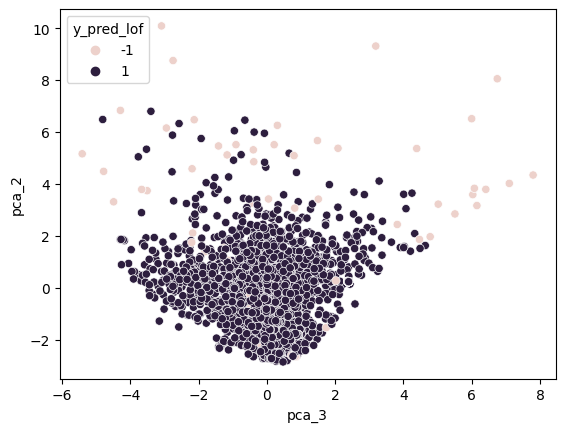

In [140]:
sns.scatterplot( base_pred, x='pca_3', y= 'pca_2', hue= 'y_pred_lof' )

usamos la combinación pca_1 y pca_3 para el Local Outlier Factor

<Axes: xlabel='pca_1', ylabel='pca_3'>

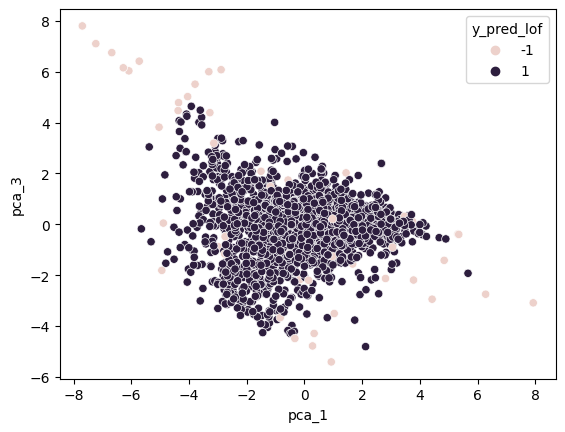

In [141]:
sns.scatterplot( base_pred, x='pca_1', y= 'pca_3', hue= 'y_pred_lof' )

Finalmente tenemos una visualización interactiva de la dispersión de los datos luego de analizar sus componentes principales PCA

In [158]:
import plotly.graph_objects as go
# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame({'pca_1': pca_calculado[:, 0],
                       'pca_2': pca_calculado[:, 1],
                       'pca_3': pca_calculado[:, 2],
                       'y_pred_ifrst': base_pred['y_pred_ifrst'],
                       'y_pred_lof': base_pred['y_pred_lof']})

# Crear una figura interactiva con Plotly
fig = go.Figure()

# Agregar trazas de dispersión para PCA 1 vs. PCA 2
fig.add_trace(go.Scatter(x=pca_df['pca_1'], y=pca_df['pca_2'], mode='markers',
                         marker=dict(color=pca_df['y_pred_ifrst']),
                         text=pca_df.index, name='PCA 1 vs. PCA 2 (y_pred_ifrst)'))

# Agregar trazas de dispersión para PCA 3 vs. PCA 2
fig.add_trace(go.Scatter(x=pca_df['pca_3'], y=pca_df['pca_2'], mode='markers',
                         marker=dict(color=pca_df['y_pred_ifrst']),
                         text=pca_df.index, name='PCA 3 vs. PCA 2 (y_pred_ifrst)'))

# Agregar trazas de dispersión para PCA 1 vs. PCA 3
fig.add_trace(go.Scatter(x=pca_df['pca_1'], y=pca_df['pca_3'], mode='markers',
                         marker=dict(color=pca_df['y_pred_ifrst']),
                         text=pca_df.index, name='PCA 1 vs. PCA 3 (y_pred_ifrst)'))

# Agregar trazas de dispersión para PCA 1 vs. PCA 2 (y_pred_lof)
fig.add_trace(go.Scatter(x=pca_df['pca_1'], y=pca_df['pca_2'], mode='markers',
                         marker=dict(color=pca_df['y_pred_lof']),
                         text=pca_df.index, name='PCA 1 vs. PCA 2 (y_pred_lof)'))

# Agregar trazas de dispersión para PCA 3 vs. PCA 2 (y_pred_lof)
fig.add_trace(go.Scatter(x=pca_df['pca_3'], y=pca_df['pca_2'], mode='markers',
                         marker=dict(color=pca_df['y_pred_lof']),
                         text=pca_df.index, name='PCA 3 vs. PCA 2 (y_pred_lof)'))

# Agregar trazas de dispersión para PCA 1 vs. PCA 3 (y_pred_lof)
fig.add_trace(go.Scatter(x=pca_df['pca_1'], y=pca_df['pca_3'], mode='markers',
                         marker=dict(color=pca_df['y_pred_lof']),
                         text=pca_df.index, name='PCA 1 vs. PCA 3 (y_pred_lof)'))

# Personalizar el diseño de la figura
fig.update_layout(title='Visualización Interactiva de PCA',
                  xaxis_title='PCA 1', yaxis_title='PCA 2 / PCA 3')

# Habilitar la funcionalidad de zoom y panning
fig.update_xaxes(constrain='domain', scaleratio=1)
fig.update_yaxes(scaleratio=1)

# Mostrar la figura interactiva
fig.show()